# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [19]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_2'] = tips['tip_pct'] * tips['net_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_2
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,1.01
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,1.66
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,3.50
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,3.31
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,3.61


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     68.11
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           1.03e-14
Time:                        19:21:23   Log-Likelihood:                 336.29
No. Observations:                 242   AIC:                            -668.6
Df Residuals:                     240   BIC:                            -661.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3818      0.023  

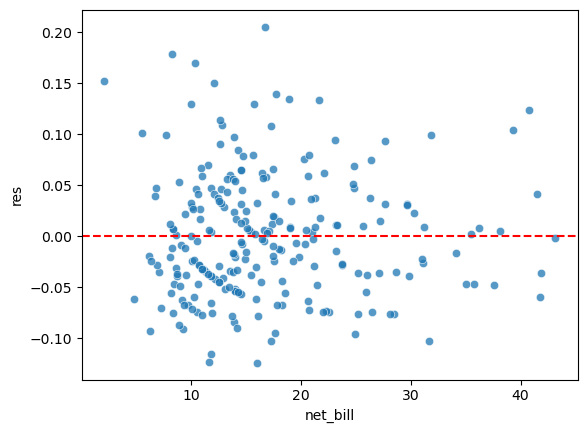

In [62]:
filtered_tips = tips[tips['tip_pct'] < 0.5]
reg = smf.ols('tip_pct ~ np.log(net_bill)', data = filtered_tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x='net_bill',y='res',data=tips,alpha=.75)
plt.axhline(y=0,color='r',linestyle='--')

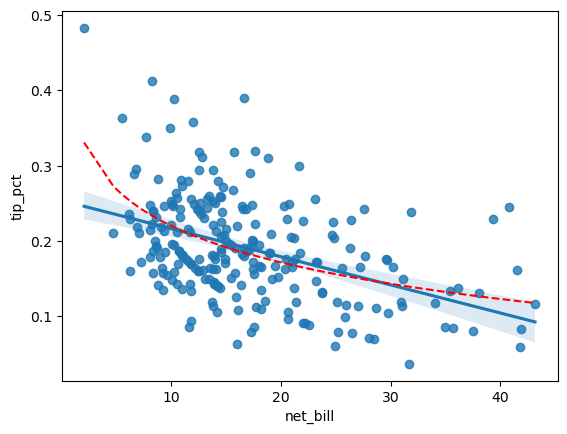

In [70]:
sns.regplot(x='net_bill',y='tip_pct',data=filtered_tips)
sorted_indices = np.argsort(filtered_tips['net_bill'])
plt.plot(filtered_tips['net_bill'].iloc[sorted_indices], 
         reg.fittedvalues.iloc[sorted_indices], 'r--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     30.98
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           1.09e-12
Time:                        19:26:45   Log-Likelihood:                 333.96
No. Observations:                 242   AIC:                            -661.9
Df Residuals:                     239   BIC:                            -651.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.29

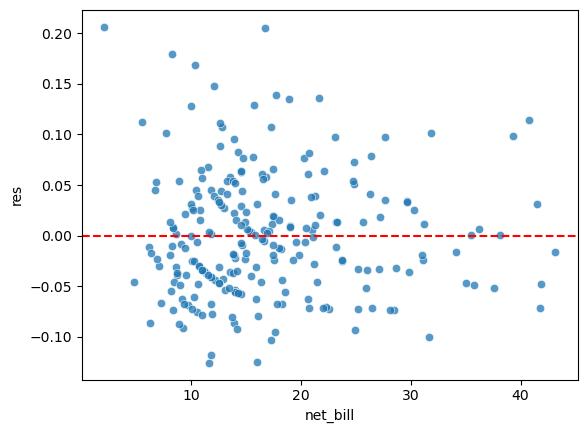

In [82]:
filtered_tips = tips[tips['tip_pct'] < 0.5]
reg = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data = filtered_tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x='net_bill',y='res',data=tips,alpha=.75)
plt.axhline(y=0,color='r',linestyle='--')

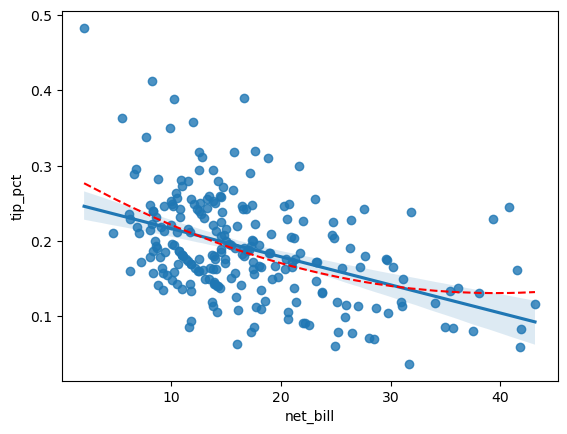

In [84]:
sns.regplot(x='net_bill',y='tip_pct',data=filtered_tips)
sorted_indices = np.argsort(filtered_tips['net_bill'])
plt.plot(filtered_tips['net_bill'].iloc[sorted_indices], 
         reg.fittedvalues.iloc[sorted_indices], 'r--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     69.62
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           5.70e-15
Time:                        19:27:48   Log-Likelihood:                -81.349
No. Observations:                 242   AIC:                             166.7
Df Residuals:                     240   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3383      0.051    -26.095      0.0

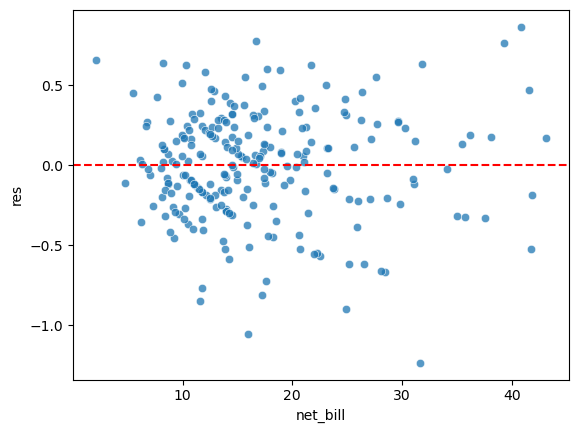

In [90]:
filtered_tips = tips[tips['tip_pct'] < 0.5]
reg = smf.ols('np.log(tip_pct) ~ net_bill', data = filtered_tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x='net_bill',y='res',data=tips,alpha=.75)
plt.axhline(y=0,color='r',linestyle='--')

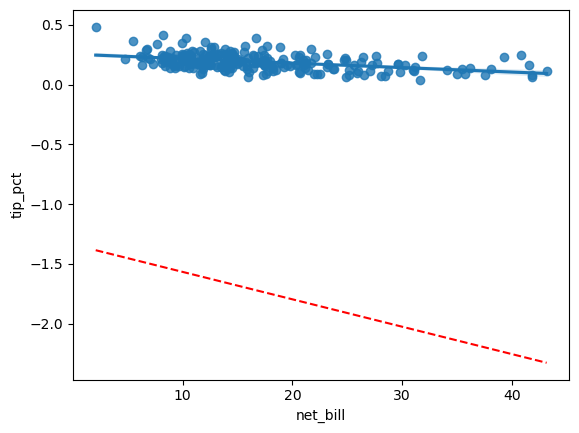

In [92]:
sns.regplot(x='net_bill',y='tip_pct',data=filtered_tips)
sorted_indices = np.argsort(filtered_tips['net_bill'])
plt.plot(filtered_tips['net_bill'].iloc[sorted_indices], 
         reg.fittedvalues.iloc[sorted_indices], 'r--')

In [96]:
tips['pred_1'] = np.exp(reg.fittedvalues)

tips[['pred_1','tip_pct']].corr().iloc[0,1]**2

0.20051484016183757

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     71.57
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           2.65e-15
Time:                        19:26:00   Log-Likelihood:                -80.588
No. Observations:                 242   AIC:                             165.2
Df Residuals:                     240   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6285      0.131  

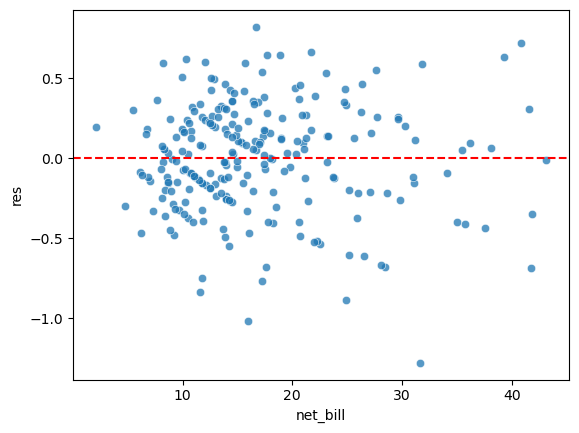

In [78]:
filtered_tips = tips[tips['tip_pct'] < 0.5]
reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = filtered_tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x='net_bill',y='res',data=tips,alpha=.75)
plt.axhline(y=0,color='r',linestyle='--')

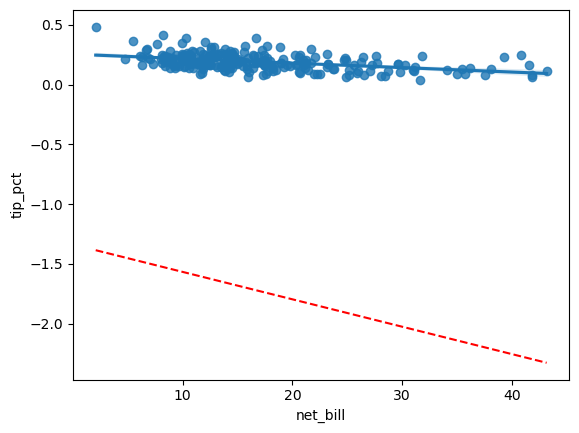

In [98]:
sns.regplot(x='net_bill',y='tip_pct',data=filtered_tips)
sorted_indices = np.argsort(filtered_tips['net_bill'])
plt.plot(filtered_tips['net_bill'].iloc[sorted_indices], 
         reg.fittedvalues.iloc[sorted_indices], 'r--')

In [100]:
tips['pred_2'] = np.exp(reg.fittedvalues)

tips[['pred_2','tip_pct']].corr().iloc[0,1]**2

0.20051484016183757

###  6. qual modelo resultou no melhor ajuste?

Aquela ajustada a funcao logaritmica de net_bill apresentou o melhor ajuste.